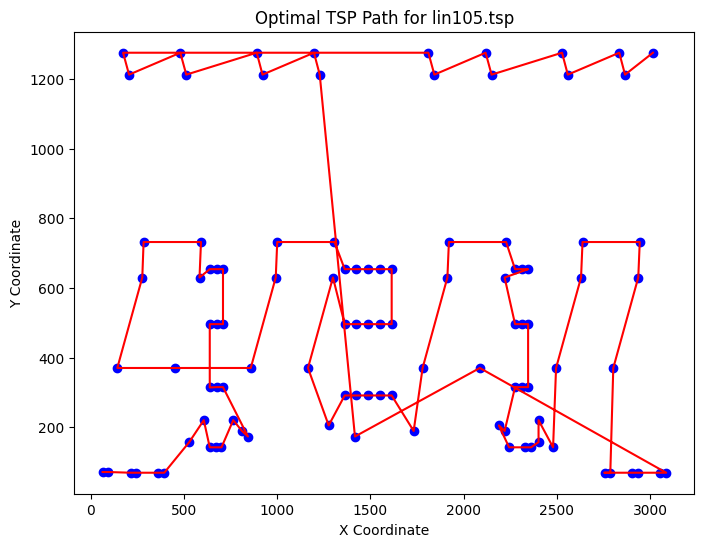

Execution time without plotting for lin105.tsp: 0.0030 seconds


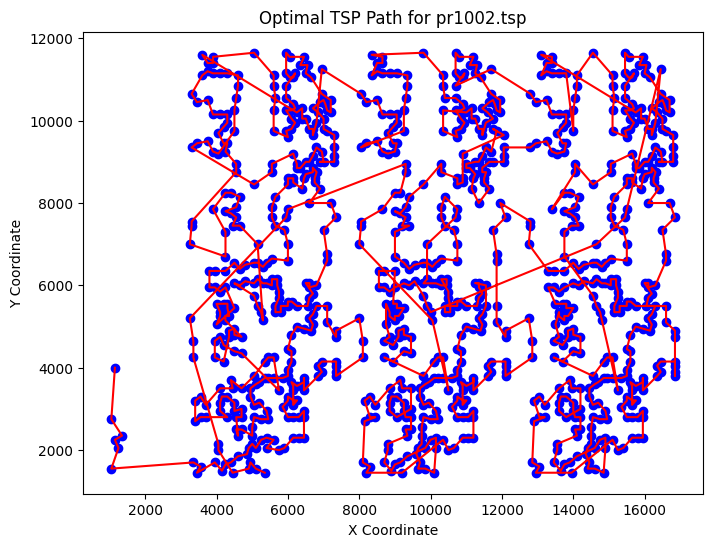

Execution time without plotting for pr1002.tsp: 0.2365 seconds


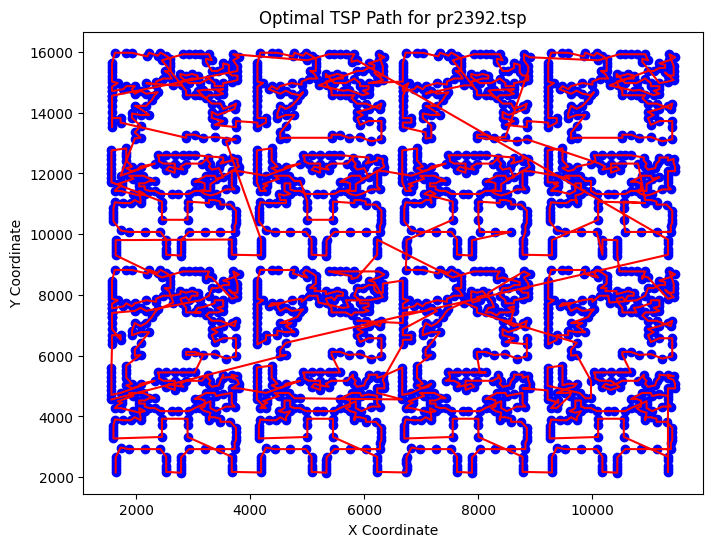

Execution time without plotting for pr2392.tsp: 1.3210 seconds


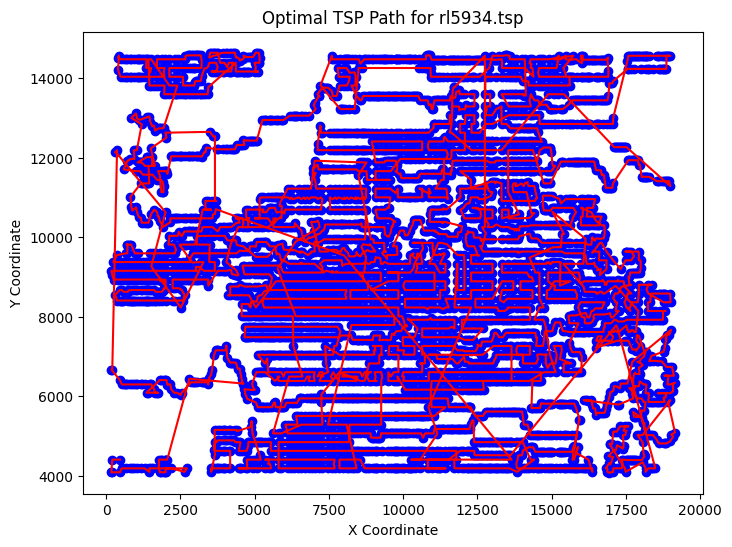

Execution time without plotting for rl5934.tsp: 8.0914 seconds


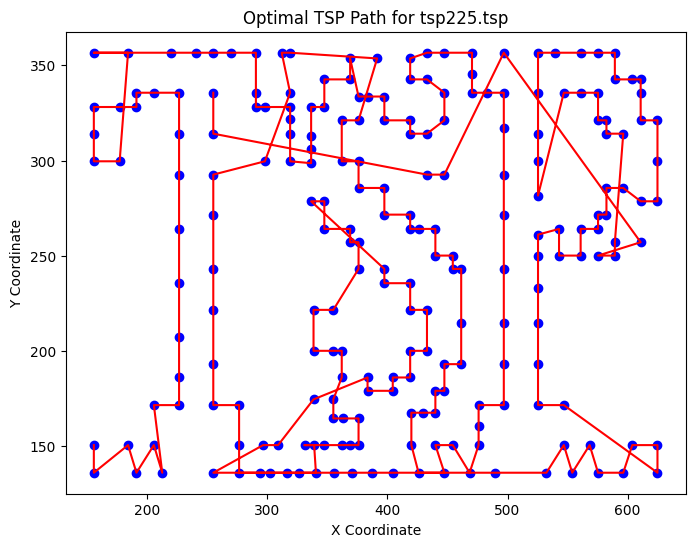

Execution time without plotting for tsp225.tsp: 0.0110 seconds
Total execution time for all files: 10.2333 seconds


In [3]:
import math
import time
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(coord1, coord2):
    return math.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

def greedy_tsp(coords):
    num_cities = len(coords)
    visited = [False] * num_cities
    path = [0]
    visited[0] = True

    while len(path) < num_cities:
        last_city = path[-1]
        min_distance = float('inf')
        nearest_city = None

        for i, coord in enumerate(coords):
            if not visited[i]:
                distance = euclidean_distance(coords[last_city], coord)
                if distance < min_distance:
                    min_distance = distance
                    nearest_city = i

        path.append(nearest_city)
        visited[nearest_city] = True

    path.append(0)  # Assuming the path needs to be a cycle

    return path

def plot_tsp(file_name):
    coords = []
    with open(file_name) as f:
        lines = f.readlines()[6:]
        for line in lines:
            parts = line.strip().split()
            if len(parts) >= 3 and parts[0].isdigit():
                city = int(parts[0]) - 1
                x, y = map(float, parts[1:])
                coords.append((x, y))

    # Precompute coordinates for efficiency
    x_coords = np.array([coord[0] for coord in coords])
    y_coords = np.array([coord[1] for coord in coords])

    start_time = time.time()
    path = greedy_tsp(coords)
    execution_time_without_plotting = time.time() - start_time

    # Vectorized line plotting
    path_x = x_coords[path[:-1]]  # Exclude the last city (already connected to first)
    path_y = y_coords[path[:-1]]

    # Plot the optimal path
    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, color='blue')
    plt.plot(path_x, path_y, color='red')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'Optimal TSP Path for {file_name}')
    plt.show()  # Display the plot without saving the image

    # Write information to a file
    with open(file_name + "_info.txt", "w") as info_file:
        info_file.write(f"Dataset: {file_name}\n")
        info_file.write(f"Algorithm Execution Time (without plotting): {execution_time_without_plotting:.4f} seconds\n")
        info_file.write("Optimal TSP Path:\n")
        for city_index in path:
            info_file.write(f"{coords[city_index]}\n")

    return execution_time_without_plotting, time.time() - start_time

tsp_files = ['lin105.tsp', 'pr1002.tsp', 'pr2392.tsp', 'rl5934.tsp', 'tsp225.tsp']
total_execution_time = 0

for tsp_file in tsp_files:
    execution_time_without_plotting, total_time = plot_tsp(tsp_file)
    total_execution_time += total_time
    print(f"Execution time without plotting for {tsp_file}: {execution_time_without_plotting:.4f} seconds")

print(f"Total execution time for all files: {total_execution_time:.4f} seconds")
